In [ ]:
!pip install --upgrade pip
!pip install --upgrade git+https://github.com/google/lightweight_mmm.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Cloning https://github.com/google/lightweight_mmm.git to /tmp/pip-req-build-cuin3jed
  Running command git clone --filter=blob:none --quiet https://github.com/google/lightweight_mmm.git /tmp/pip-req-build-cuin3jed
  Resolved https://github.com/google/lightweight_mmm.git to commit 4406aaa77bddc5b0d73d31c6cf4f2ace03f3ffda
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 21.6 MB/s eta 0:00:00
  Created wheel for lightweight-mmm: filename=lightweight_mmm-0.1.9-py3-none-any.whl size=105532 sha256=1e610bf0d6adeeff9bdc6defad4fb8dc1f096b5ae544ed9fe8736e36c8d19522
  S

In [ ]:
import pandas as pd
from lightweight_mmm import preprocessing, lightweight_mmm, plot, optimize_media
import jax.numpy as jnp
from sklearn.metrics import mean_absolute_percentage_error
import jax.numpy as jnp
import numpyro
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils

In [ ]:
ins_data = pd.read_csv("/content/instagram_processed_data.csv", usecols=["Impressions", "Reach", "Engaged Users", "Fan Growth", "Views", "Cost", "Consideration", "Awareness", "Engagement"])

In [ ]:
yt_data = pd.read_csv("/content/youtube_processed_data.csv", usecols=["Impressions", "Reach", "Engaged Users", "Fan Growth", "Views", "Cost", "Consideration", "Awareness", "Engagement"])

In [ ]:
fb_data = pd.read_csv("/content/facebook_processed_data.csv", usecols=["Lifetime Post Total Impressions", "Reach", "Engaged Users", "Fan Growth", "Views", "Cost", "Consideration", "Awareness", "Engagement"])

In [ ]:
ins_data.shape

(970, 9)

In [ ]:
fb_data.shape

(398, 9)

In [ ]:
yt_data.shape

(500, 9)

In [ ]:
ins_data = ins_data[:398]

In [ ]:
ins_data.shape

(398, 9)

In [ ]:
yt_data = yt_data[:398]

In [ ]:
yt_data.shape

(398, 9)

In [ ]:
type(fb_data)

pandas.core.frame.DataFrame

In [ ]:
ins_media_data = ins_data[["Impressions"]]

fb_media_data = fb_data[["Lifetime Post Total Impressions"]]

yt_media_data = yt_data[["Impressions"]]

ins_cost_data = ins_data[["Cost"]]

fb_cost_data = fb_data[["Cost"]]

yt_cost_data = yt_data[["Cost"]]

ins_sales_data = ins_data[["Awareness"]]

fb_sales_data = fb_data[["Awareness"]]

yt_sales_data = yt_data[["Awareness"]]

ins_extra_features_data = ins_data[["Reach", "Engaged Users", "Fan Growth", "Views"]]

fb_extra_features_data = fb_data[["Reach", "Engaged Users", "Fan Growth", "Views"]]

yt_extra_features_data = yt_data[["Reach", "Engaged Users", "Fan Growth", "Views"]]


In [ ]:
# Reset index if the dataframes do not align properly
ins_media_data.reset_index(drop=True, inplace=True)
fb_media_data.reset_index(drop=True, inplace=True)
yt_media_data.reset_index(drop=True, inplace=True)

# Concatenate and rename columns
across_platform_media_data_df = pd.concat([fb_media_data, ins_media_data, yt_media_data], axis=1)
across_platform_media_data_df.columns = ['fb_media_data', 'ins_media_data', 'yt_media_data']


In [ ]:
across_platform_media_data = across_platform_media_data_df.to_numpy()

In [ ]:
across_platform_media_data

array([[   48479,     7705, 20864347],
       [    5661,    15187,   402603],
       [   14714,    12381,   105681],
       ...,
       [   18398,     2323,      672],
       [    9071,     1967,      404],
       [    5367,     2376,      235]])

In [ ]:
# Reset index if the dataframes do not align properly
ins_cost_data = ins_cost_data.sum(axis=0)
fb_cost_data = fb_cost_data.sum(axis=0)
yt_cost_data = yt_cost_data.sum(axis=0)

# Concatenate and rename columns
#across_platform_cost_data_df = pd.concat([fb_cost_data, ins_cost_data, yt_cost_data], axis=1)
#across_platform_cost_data_df.columns = ['fb_cost_data', 'ins_cost_data', 'yt_cost_data']

In [ ]:
type(ins_cost_data.to_numpy().reshape(-1, 1))

numpy.ndarray

In [ ]:
import numpy as np
across_platform_cost_data = np.concatenate([fb_cost_data, ins_cost_data, yt_cost_data], axis=0)

In [ ]:
across_platform_cost_data

array([340847.055,  10589.634, 329754.832])

In [ ]:
# Reset index if the dataframes do not align properly
ins_sales_data.reset_index(drop=True, inplace=True)
fb_sales_data.reset_index(drop=True, inplace=True)
yt_sales_data.reset_index(drop=True, inplace=True)

# Concatenate and rename columns
# across_platform_sales_data_df = pd.concat([fb_sales_data, ins_sales_data, yt_sales_data], axis=1)
across_platform_sales_data_df = (fb_sales_data + ins_sales_data + yt_sales_data)/3
across_platform_sales_data_df.columns = ['across_platform_sales_data']

In [ ]:
across_platform_sales_data = across_platform_sales_data_df.to_numpy()

In [ ]:
across_platform_sales_data.shape

(398, 1)

In [ ]:
# Reset index if the dataframes do not align properly
ins_sales_data.reset_index(drop=True, inplace=True)
fb_sales_data.reset_index(drop=True, inplace=True)
yt_sales_data.reset_index(drop=True, inplace=True)

# Concatenate and rename columns
# across_platform_sales_data_df = pd.concat([fb_sales_data, ins_sales_data, yt_sales_data], axis=1)
across_platform_sales_data_df1 = (fb_sales_data + ins_sales_data + yt_sales_data)
across_platform_sales_data_df1.columns = ['across_platform_sales_data']

In [ ]:
across_platform_sales_data1 = across_platform_sales_data_df1.to_numpy()

In [ ]:
across_platform_sales_data1.shape

(398, 1)

In [ ]:
# Reset index if the dataframes do not align properly
ins_extra_features_data.reset_index(drop=True, inplace=True)
fb_extra_features_data.reset_index(drop=True, inplace=True)
yt_extra_features_data.reset_index(drop=True, inplace=True)

# Concatenate and rename columns
across_platform_extra_features_data_df = pd.concat([fb_extra_features_data, ins_extra_features_data, yt_extra_features_data], axis=1)
across_platform_extra_features_data_df.columns = ['fb_reach_data', 'fb_engaged_user_data', 'fb_fan_growth_data', 'fb_views_data', 'ins_reach_data', 'ins_engaged_user_data', 'ins_fan_growth_data', 'ins_views_data', 'yt_reach_data', 'yt_engaged_user_data', 'yt_fan_growth_data', 'yt_views_data']

In [ ]:
across_platform_extra_features_data = across_platform_extra_features_data_df.to_numpy()
across_platform_extra_features_data.shape

(398, 12)

In [ ]:
media_data_train = across_platform_media_data[:300]
media_data_test = across_platform_media_data[300:]
target_data_train = across_platform_sales_data[:300]
target_data_test = across_platform_sales_data[300:]
target_data_train1 = across_platform_sales_data1[:300]
target_data_test1 = across_platform_sales_data1[300:]
cost_data_train = across_platform_cost_data
#cost_data_train = cost_data_train.reshape(-1, 1)
#cost_data_test = cost_data[388:].sum(axis=0)
#cost_data_test = cost_data_test.reshape(-1, 1)
extra_features_data_train = across_platform_extra_features_data[:300]
extra_features_data_test = across_platform_extra_features_data[300:]

In [ ]:
media_data_train

array([[   48479,     7705, 20864347],
       [    5661,    15187,   402603],
       [   14714,    12381,   105681],
       [    3720,    18267,    29559],
       [    9740,    12898,   129191],
       [    7343,    13656,   151334],
       [    9669,    32909,   441897],
       [   17851,     7544,    31875],
       [   11593,    31033,    79494],
       [    8877,    46111,   107860],
       [    3342,    31947,   191652],
       [   15366,    15808,     1817],
       [    2005,    43851,   212130],
       [   19091,     6377,    30468],
       [    8668,     9316,    63833],
       [    3242,     5653,    62847],
       [   10956,     7521,      447],
       [    2996,    10099,  5281234],
       [   18373,     8184,        3],
       [    3759,    11394,        2],
       [    8555,     5777,   110126],
       [    4105,    18575,    32126],
       [    8678,     8523,    66792],
       [    3137,    11585,    64846],
       [   14532,     7879,        0],
       [    9701,     374

In [ ]:
media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(
    divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
extra_features_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)

In [ ]:
media_data_train_scaled = media_scaler.fit_transform(media_data_train)
target_train_scaled = target_scaler.fit_transform(target_data_train)
target_train_scaled1 = target_scaler.fit_transform(target_data_train1)
costs_scaled = cost_scaler.fit_transform(cost_data_train)
extra_features_scaled = extra_features_scaler.fit_transform(extra_features_data_train)

media_data_test_scaled = media_scaler.transform(media_data_test)
extra_features_test_scaled = extra_features_scaler.fit_transform(extra_features_data_test)

NameError: name 'media_scaler' is not defined

In [ ]:
target_train_scaled.shape

NameError: name 'target_train_scaled' is not defined

In [ ]:
costs_scaled.shape

(3,)

In [ ]:
media_data_train_scaled.shape

(300, 3)

In [ ]:
mmm = lightweight_mmm.LightweightMMM(model_name="carryover")

In [ ]:
# For replicability in terms of random number generation in sampling
# reuse the same seed for different trainings.
mmm.fit(
    media=media_data_train_scaled,
    media_prior=costs_scaled,
    target=target_train_scaled,
    extra_features=extra_features_scaled,
    number_warmup=1000,
    number_samples=1000,
    seed=1)

/usr/local/lib/python3.10/dist-packages/lightweight_mmm/lightweight_mmm.py:359: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC(
sample: 100%|██████████| 2000/2000 [07:21<00:00,  4.53it/s, 511 steps of size 1.18e-02. acc. prob=0.86]


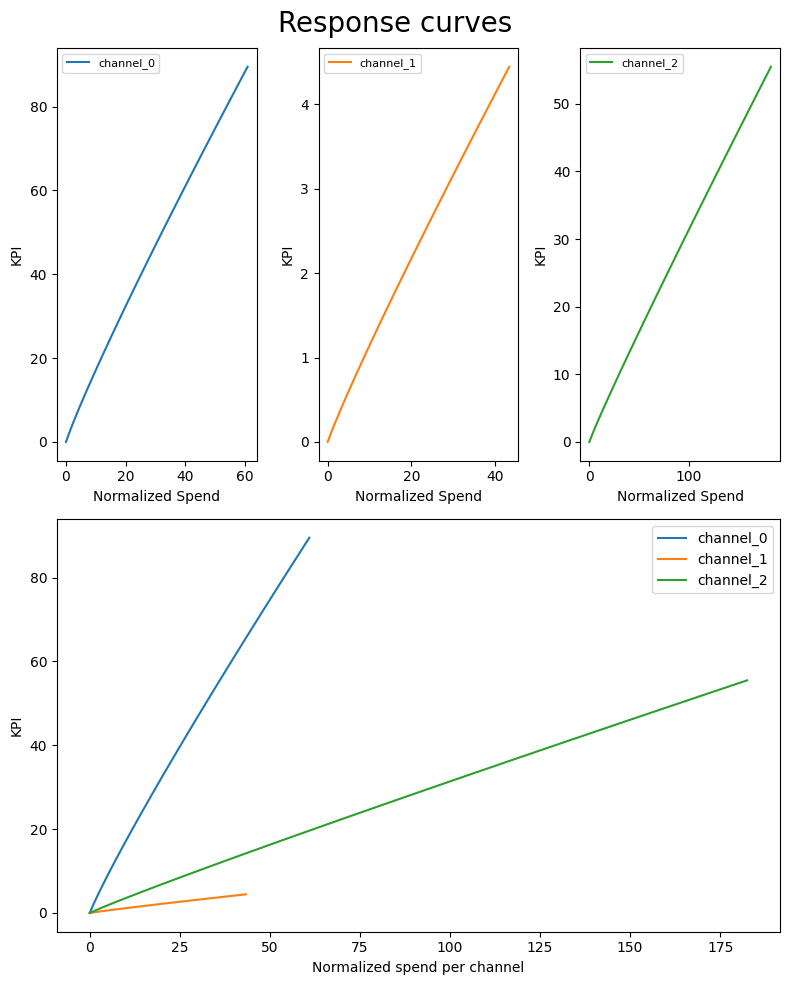

In [ ]:
plot.plot_response_curves(
    media_mix_model=mmm, target_scaler=target_scaler, seed=1)

In [ ]:
prices = jnp.ones(mmm.n_media_channels)

In [ ]:
n_time_periods = 10
budget = jnp.sum(jnp.dot(prices, across_platform_media_data.mean(axis=0)))* n_time_periods

In [ ]:
# Run optimization with the parameters of choice.
solution, kpi_without_optim, previous_media_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    extra_features=extra_features_scaler.transform(extra_features_data_test)[:n_time_periods],
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    seed=1)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -582.0719447686383
            Iterations: 2
            Function evaluations: 14
            Gradient evaluations: 2


In [ ]:
# Obtain the optimal weekly allocation.
optimal_buget_allocation = prices * solution.x
optimal_buget_allocation

Array([2320661.8 ,   78933.44, 1549859.2 ], dtype=float32)

In [ ]:
# similar renormalization to get previous budget allocation
previous_budget_allocation = prices * previous_media_allocation
previous_budget_allocation

Array([2320661.8 ,   78933.34, 1549859.1 ], dtype=float32)

In [ ]:
# Both these values should be very close in order to compare KPI
budget, optimal_buget_allocation.sum()

(Array(3949454.5, dtype=float32), Array(3949454.5, dtype=float32))

In [ ]:
# Both numbers should be almost equal
budget, jnp.sum(solution.x * prices)

(Array(3949454.5, dtype=float32), Array(3949454.5, dtype=float32))

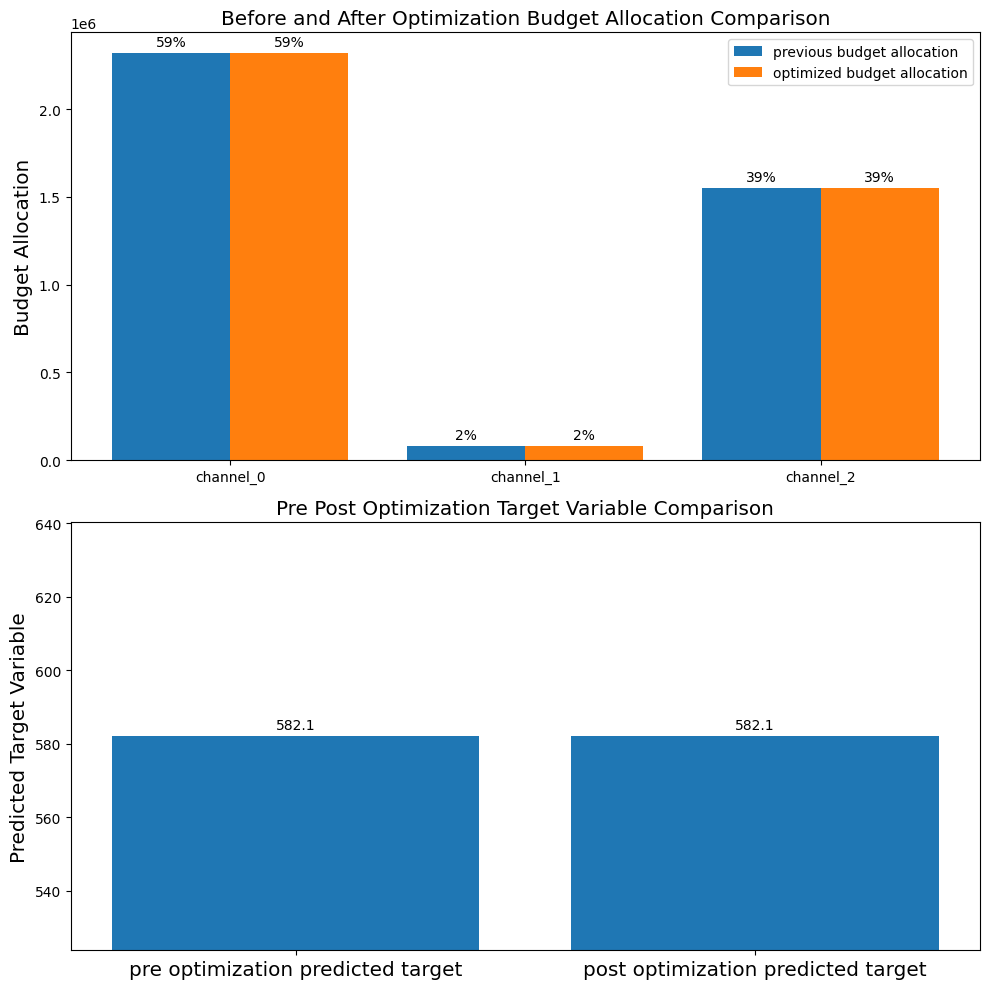

In [ ]:
# Plot out pre post optimization budget allocation and predicted target variable comparison.
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm,
                                                kpi_with_optim=solution['fun'],
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_buget_allocation,
                                                previous_budget_allocation=previous_budget_allocation,
                                                figure_size=(10,10))

In [ ]:
mmm.print_summary()


                                 mean       std    median      5.0%     95.0%     n_eff     r_hat
ad_effect_retention_rate[0]      0.49      0.21      0.45      0.23      0.99     90.68      1.03
ad_effect_retention_rate[1]      0.51      0.22      0.47      0.22      1.00    364.39      1.02
ad_effect_retention_rate[2]      0.45      0.24      0.35      0.22      1.00      4.24      1.14
     coef_extra_features[0]     -0.10      0.10     -0.12     -0.21      0.00      1.00     30.68
     coef_extra_features[1]      0.13      0.13      0.13     -0.00      0.25      1.00     61.34
     coef_extra_features[2]     -0.10      0.42     -0.11     -0.81      0.75    670.94      1.00
     coef_extra_features[3]     -0.05      0.05     -0.05     -0.10      0.00      1.00     30.08
     coef_extra_features[4]     -0.40      0.39     -0.44     -0.79      0.02      1.00     19.73
     coef_extra_features[5]      0.21      0.21      0.24     -0.02      0.42      1.00     18.17
     coef_extra_fea

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:957: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "histogram" failed type inference due to: No implementation of function Function(<function histogram at 0x7c1ea2ba3130>) found for signature:
 
 >>> histogram(readonly buffer(float32, 1d, C), bins=int64, range=UniTuple(readonly buffer(float32, 0d, C) x 2))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload in fu

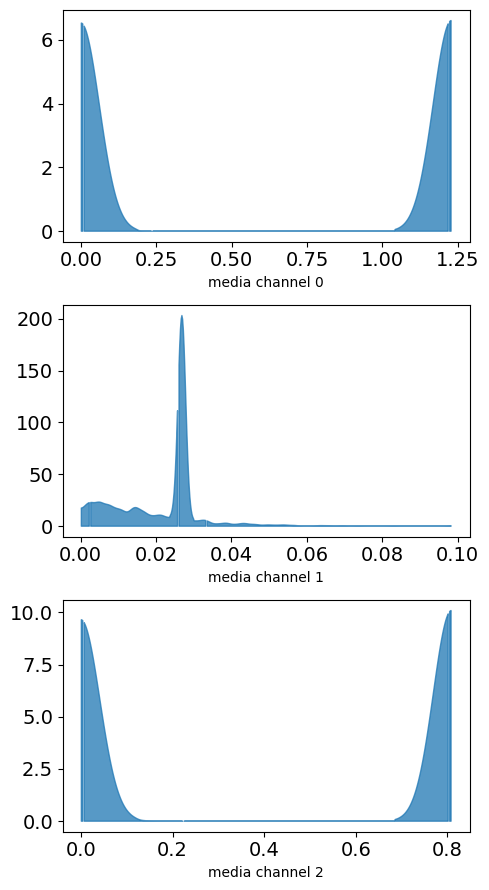

In [ ]:
plot.plot_media_channel_posteriors(media_mix_model=mmm)

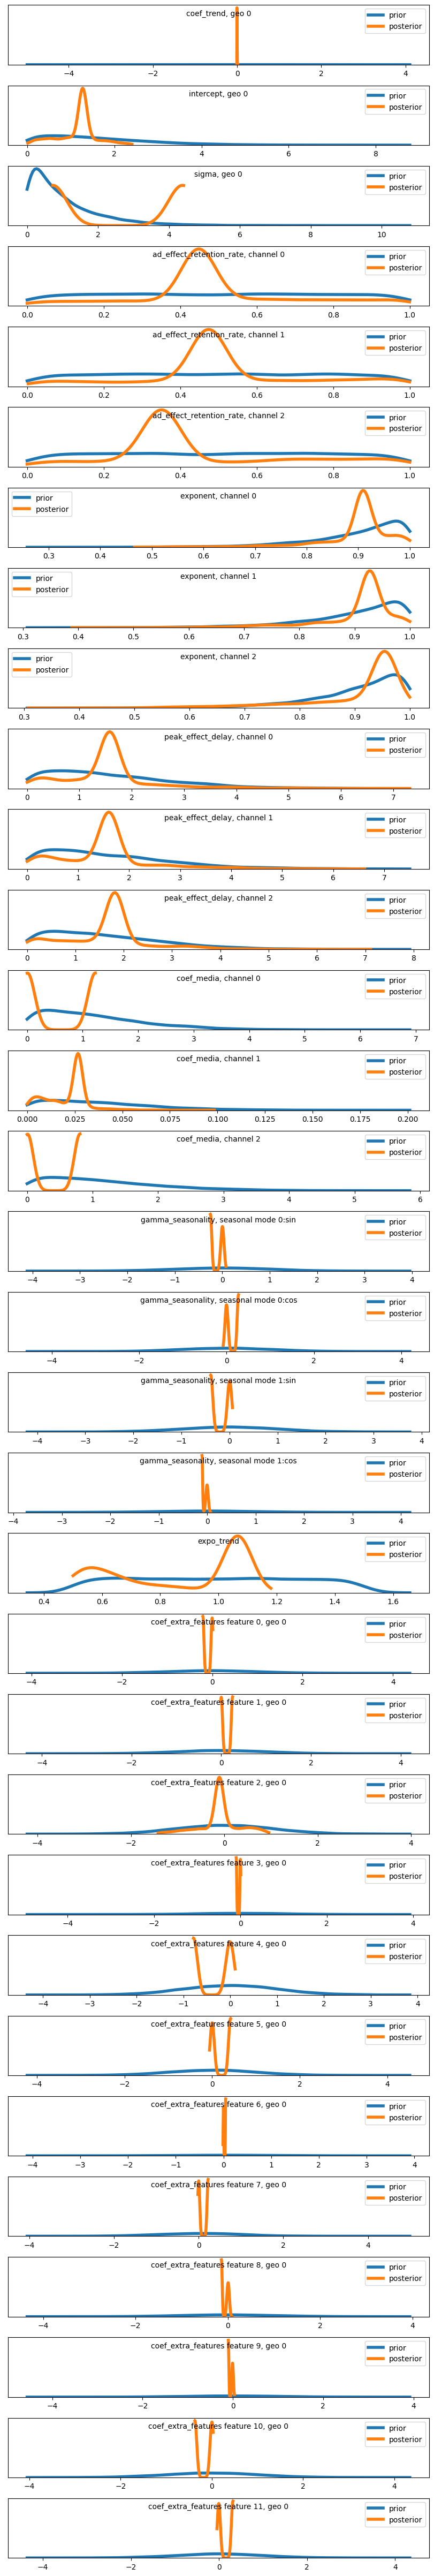

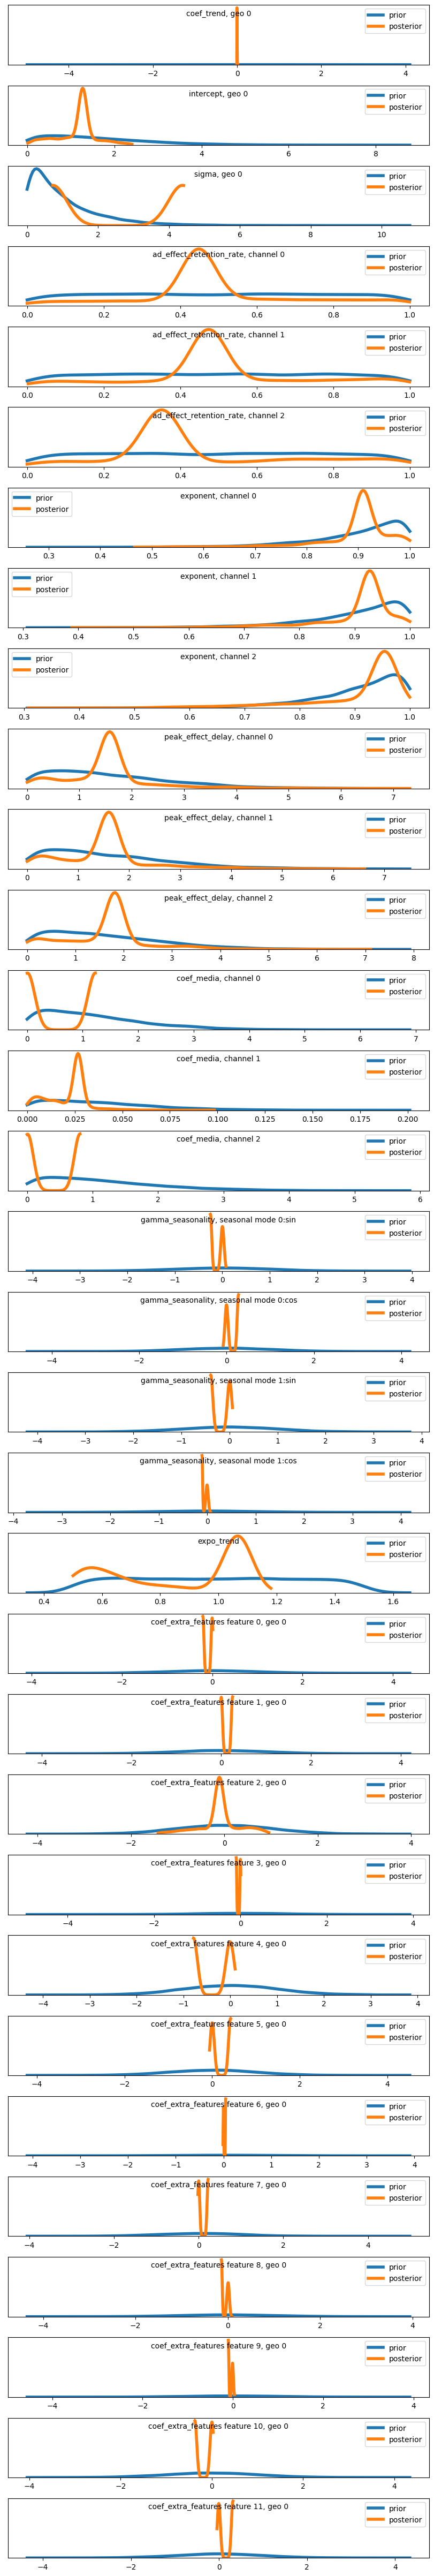

In [ ]:
plot.plot_prior_and_posterior(media_mix_model=mmm)

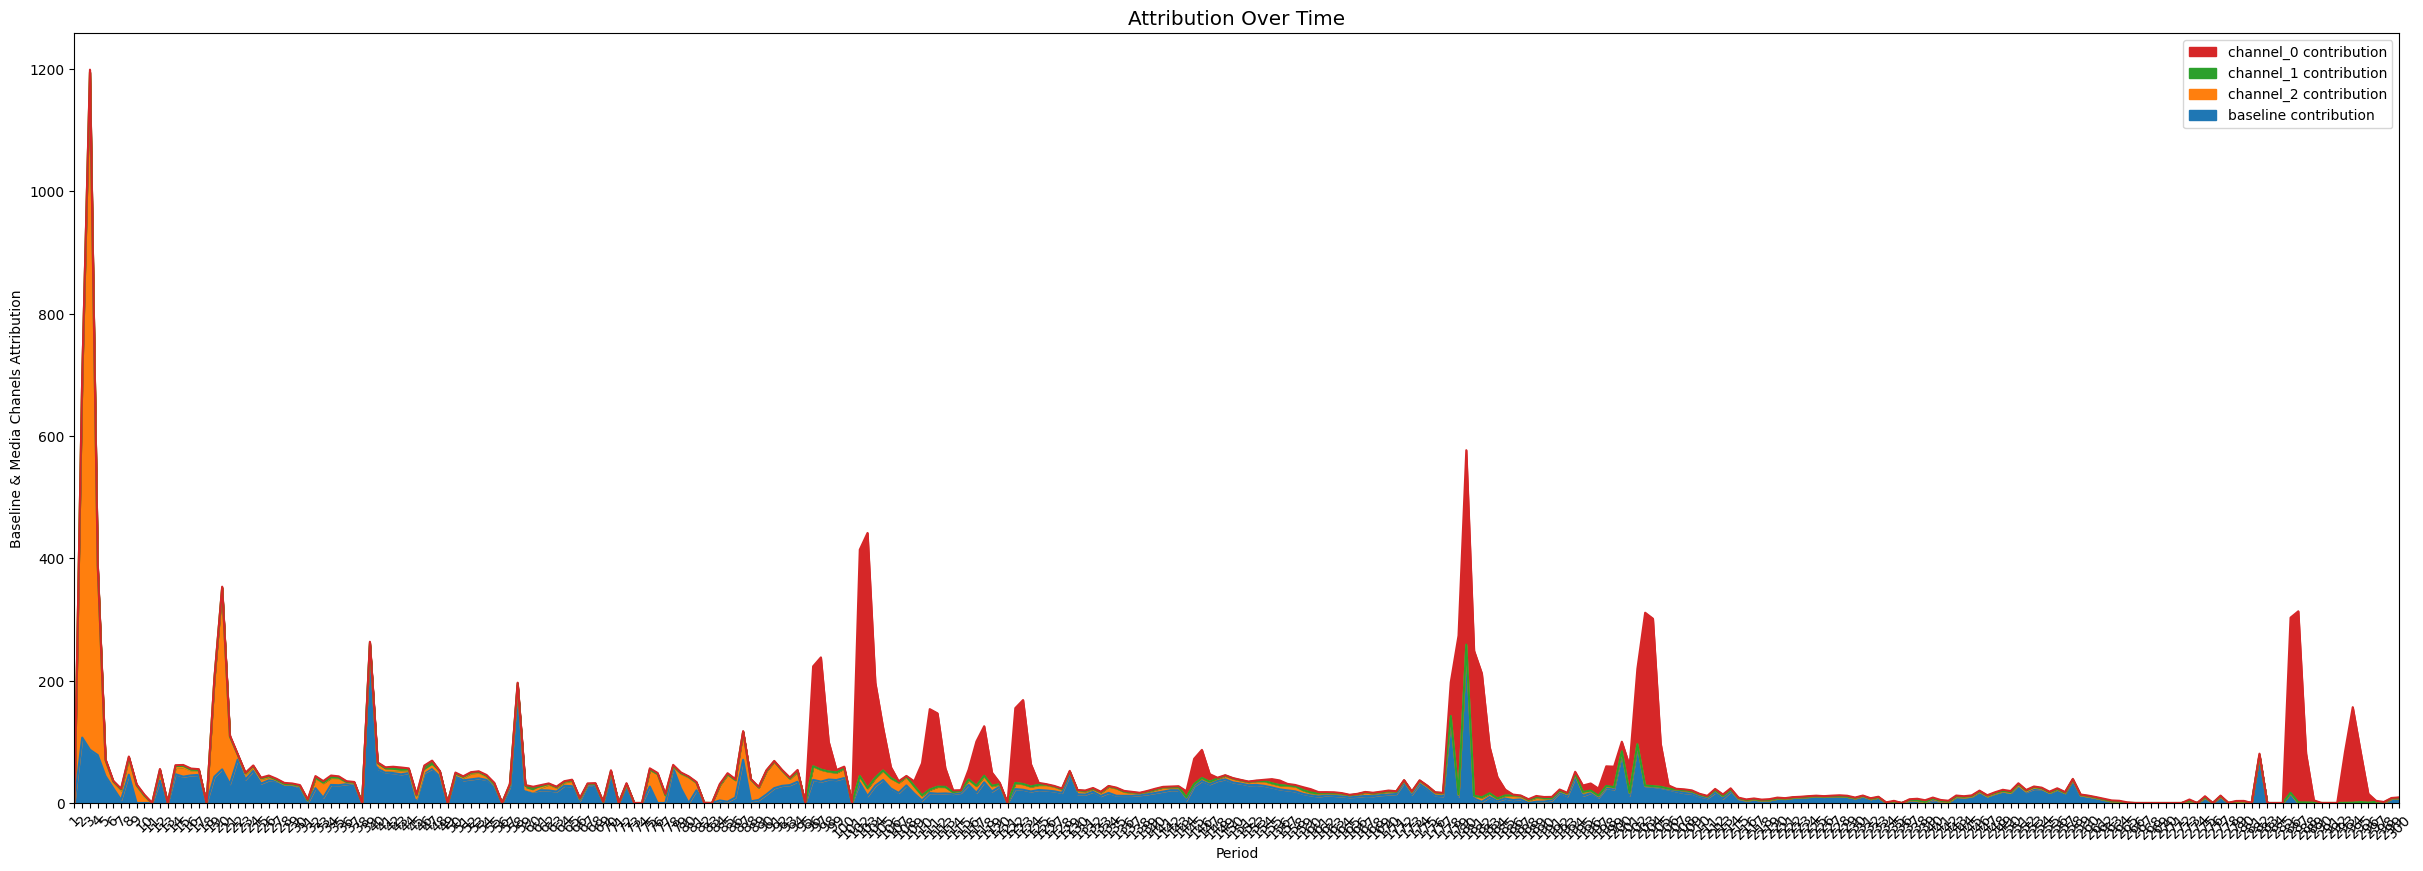

In [ ]:
plot.plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10))

In [ ]:
adstock_models = ["adstock", "hill_adstock", "carryover"]
degrees_season = [1,2,3]

#adstock_models = ["hill_adstock"]
#degrees_season = [1]


for model_name in adstock_models:
    for degrees in degrees_season:
        mmm = lightweight_mmm.LightweightMMM(model_name=model_name)
        mmm.fit(media=media_data_train_scaled,
                media_prior=costs_scaled,
                target=target_train_scaled,
                extra_features=extra_features_scaled,
                number_warmup=1000,
                number_samples=1000,
                number_chains=1,

                seed=1)

        prediction = mmm.predict(
        media=media_data_test_scaled,
        extra_features=extra_features_test_scaled,
        target_scaler=target_scaler,
        seed=1)
        p = prediction.mean(axis=0)

        mape = mean_absolute_percentage_error(target_data_test, p)
        print(f"model_name={model_name} degrees={degrees} MAPE={mape} samples={p[:3]}")

sample: 100%|██████████| 2000/2000 [07:56<00:00,  4.20it/s, 255 steps of size 8.87e-03. acc. prob=0.91]


model_name=adstock degrees=1 MAPE=6.274077772610715 samples=[38.99081  38.892    38.890026]


sample: 100%|██████████| 2000/2000 [07:56<00:00,  4.20it/s, 255 steps of size 8.87e-03. acc. prob=0.91]


model_name=adstock degrees=2 MAPE=6.274077772610715 samples=[38.99081  38.892    38.890026]


sample: 100%|██████████| 2000/2000 [07:56<00:00,  4.19it/s, 255 steps of size 8.87e-03. acc. prob=0.91]


model_name=adstock degrees=3 MAPE=6.274077772610715 samples=[38.99081  38.892    38.890026]


sample: 100%|██████████| 2000/2000 [06:50<00:00,  4.87it/s, 28 steps of size 9.97e-03. acc. prob=0.86] 


model_name=hill_adstock degrees=1 MAPE=6.120232609851909 samples=[39.079338 39.063057 39.05347 ]


sample: 100%|██████████| 2000/2000 [06:49<00:00,  4.88it/s, 28 steps of size 9.97e-03. acc. prob=0.86] 


model_name=hill_adstock degrees=2 MAPE=6.120232609851909 samples=[39.079338 39.063057 39.05347 ]


sample: 100%|██████████| 2000/2000 [06:49<00:00,  4.88it/s, 28 steps of size 9.97e-03. acc. prob=0.86]


model_name=hill_adstock degrees=3 MAPE=6.120232609851909 samples=[39.079338 39.063057 39.05347 ]


sample: 100%|██████████| 2000/2000 [08:34<00:00,  3.88it/s, 511 steps of size 1.28e-02. acc. prob=0.88]


model_name=carryover degrees=1 MAPE=6.134819157799534 samples=[38.863815 38.80171  38.79249 ]


sample: 100%|██████████| 2000/2000 [09:12<00:00,  3.62it/s, 511 steps of size 1.28e-02. acc. prob=0.88]


model_name=carryover degrees=2 MAPE=6.134819157799534 samples=[38.863815 38.80171  38.79249 ]


sample: 100%|██████████| 2000/2000 [08:37<00:00,  3.87it/s, 511 steps of size 1.28e-02. acc. prob=0.88]


model_name=carryover degrees=3 MAPE=6.134819157799534 samples=[38.863815 38.80171  38.79249 ]


In [ ]:
adstock_models = ["adstock", "hill_adstock", "carryover"]
degrees_season = [1,2,3]

#adstock_models = ["hill_adstock"]
#degrees_season = [1]


for model_name in adstock_models:
    for degrees in degrees_season:
        mmm = lightweight_mmm.LightweightMMM(model_name=model_name)
        mmm.fit(media=media_data_train_scaled,
                media_prior=costs_scaled,
                target=target_train_scaled1,
                extra_features=extra_features_scaled,
                number_warmup=1000,
                number_samples=1000,
                number_chains=1,

                seed=1)

        prediction = mmm.predict(
        media=media_data_test_scaled,
        extra_features=extra_features_test_scaled,
        target_scaler=target_scaler,
        seed=1)
        p = prediction.mean(axis=0)

        mape = mean_absolute_percentage_error(target_data_test1, p)
        print(f"model_name={model_name} degrees={degrees} MAPE={mape} samples={p[:3]}")

sample: 100%|██████████| 2000/2000 [06:22<00:00,  5.23it/s, 511 steps of size 1.05e-02. acc. prob=0.85]


model_name=adstock degrees=1 MAPE=6.209453830873785 samples=[116.156265 115.84778  115.78711 ]


sample: 100%|██████████| 2000/2000 [06:21<00:00,  5.24it/s, 511 steps of size 1.05e-02. acc. prob=0.85]


model_name=adstock degrees=2 MAPE=6.209453830873785 samples=[116.156265 115.84778  115.78711 ]


sample: 100%|██████████| 2000/2000 [06:20<00:00,  5.26it/s, 511 steps of size 1.05e-02. acc. prob=0.85]


model_name=adstock degrees=3 MAPE=6.209453830873785 samples=[116.156265 115.84778  115.78711 ]


sample: 100%|██████████| 2000/2000 [06:08<00:00,  5.43it/s, 511 steps of size 9.57e-03. acc. prob=0.93]


model_name=hill_adstock degrees=1 MAPE=6.096471260182594 samples=[117.15043 117.11738 116.99884]


sample: 100%|██████████| 2000/2000 [06:07<00:00,  5.44it/s, 511 steps of size 9.57e-03. acc. prob=0.93]


model_name=hill_adstock degrees=2 MAPE=6.096471260182594 samples=[117.15043 117.11738 116.99884]


sample: 100%|██████████| 2000/2000 [06:07<00:00,  5.44it/s, 511 steps of size 9.57e-03. acc. prob=0.93]


model_name=hill_adstock degrees=3 MAPE=6.096471260182594 samples=[117.15043 117.11738 116.99884]


sample: 100%|██████████| 2000/2000 [06:59<00:00,  4.77it/s, 255 steps of size 1.47e-02. acc. prob=0.86]


model_name=carryover degrees=1 MAPE=6.1489518551245 samples=[116.74648 116.58634 116.50883]


sample: 100%|██████████| 2000/2000 [07:01<00:00,  4.75it/s, 255 steps of size 1.47e-02. acc. prob=0.86]


model_name=carryover degrees=2 MAPE=6.1489518551245 samples=[116.74648 116.58634 116.50883]


sample: 100%|██████████| 2000/2000 [07:02<00:00,  4.73it/s, 255 steps of size 1.47e-02. acc. prob=0.86]


model_name=carryover degrees=3 MAPE=6.1489518551245 samples=[116.74648 116.58634 116.50883]


In [ ]:
len(across_platform_sales_data)

398

Array([[ 0.37406737],
       [ 0.11340468],
       [ 0.16781183],
       [ 0.10021615],
       [ 0.14296088],
       [ 0.12247162],
       [ 0.13727607],
       [ 0.18806857],
       [ 0.14910205],
       [ 0.13184494],
       [ 0.09794337],
       [ 0.17332983],
       [ 0.09392767],
       [ 0.19597653],
       [ 0.13079122],
       [ 0.09714121],
       [ 0.14638704],
       [ 0.09769762],
       [ 0.19061065],
       [ 0.10568786],
       [ 0.13025767],
       [ 0.10408039],
       [ 0.1310211 ],
       [ 0.09655471],
       [ 0.16599679],
       [ 0.13726656],
       [ 0.14223713],
       [ 0.12664863],
       [ 0.09846231],
       [ 0.2521785 ],
       [ 0.12339024],
       [ 0.25139743],
       [ 0.2105427 ],
       [ 0.11059263],
       [ 0.12434731],
       [ 0.12609448],
       [ 0.16329043],
       [ 0.10793512],
       [ 0.1388318 ],
       [ 0.10391016],
       [ 0.40209433],
       [ 0.1094512 ],
       [ 0.13333242],
       [ 0.18786354],
       [ 0.10114885],
       [ 0